# Computational Mathematics
## An Introduction to Numerical Analysis and Scientific Computing with Python
### By Dimitrios Mitsotakis

# Chapter 10: Best Approximations

Best approximations are solution that minimize a particular distance.

## Linear Least Squares Problem

To compute the optimal solution 
$${\bf x}^\ast=argmin\|{\bf b}-{\bf Ax}\|_2^2$$
we will use the function `numpy.linalg.lstsq` with
$${\bf A}=\begin{pmatrix}
1 & 1\\
-1 & 1\\
1 & 1
\end{pmatrix} \mbox{ and }
{\bf b}=\begin{pmatrix}
2\\
1\\
3
\end{pmatrix}\ .$$


In [1]:
import numpy as np
import numpy.linalg as npl

In [2]:
A = np.array([[1.0 , 1.0], 
              [-1.0, 1.0], 
              [1.0, 1.0]])
b = np.array([[2.0],
              [1.0],
              [3.0]])
(x, residual, rank,s) = npl.lstsq(A,b,rcond=None)
# Note that we use rcond=None which is the new default value since v.1.14.0
print('x= '); print(x)
print('residual= '); print(residual)
print('rank= '); print(rank)
print('singular values= '); print(s)

x= 
[[0.75]
 [1.75]]
residual= 
[0.5]
rank= 
2
singular values= 
[2.         1.41421356]


We can obtain the same results using the Moore-Penrose inverse.
$$x^\ast=({\bf A}^T{\bf A}{\bf x})^{-1}{\bf A}^Tb\ ,$$
although this is not a good idea for large-scale problems.

In [3]:
# Compute the Moore-Penrose inverse
tmp = npl.inv(np.dot(np.transpose(A),A))
Amp= np.dot(tmp,np.transpose(A))
x = np.dot(Amp,b)
print('x= '); print(x)
print('x= '); print(npl.pinv(A)@b)

x= 
[[0.75]
 [1.75]]
x= 
[[0.75]
 [1.75]]


## Gram-Schmidt Orthonormalization

The modified Gram-Schmidt orthonormalization procedure can be described in the following algorithm

- ${\bf E}(:,0)={\bf X}(:,0)/\|{\bf X}(:,0)\|_2$
- For $i=2:n$
    - ${\bf E}(:,i)={\bf X}(:,i)$
    - For $j=1:i-1$
        - ${\bf E}(:,i)={\bf E}(:,i)-\left({\bf E}(:,i)^T {\bf E}(:,j)\right){\bf E}(:,j)/\|{\bf E}(:,j)\|^2$
    - EndFor
    - ${\bf E}(:,i)={\bf E}(:,i)/\|{\bf E}(:,i)\|_2$
- EndFor

An implementation can be the following:

In [4]:
def gram_schmidt(X):
    E = np.zeros(np.shape(X))
    (m,n)=np.shape(X)
    E[:,0] = X[:,0]/np.sqrt(np.inner(X[:,0],X[:,0]))
    for i in range(1,n):
        E[:,i] = X[:,i]
        for j in range(0,i):
            proj=np.inner(E[:,i],E[:,j])/np.inner(E[:,j],E[:,j])*E[:,j]
            E[:,i] = E[:,i]-proj
        E[:,i] = E[:,i]/np.sqrt(np.inner(E[:,i],E[:,i]))
    return E

we test our code with the vectors
$${\bf x}_1=\begin{pmatrix}
1\\
-1\\
-1\\
1
\end{pmatrix}, \quad
{\bf x}_2=\begin{pmatrix}
2\\
1\\
0\\
1
\end{pmatrix} \quad\mbox{ and }\quad
{\bf x}_3=\begin{pmatrix}
2\\
2\\
1\\
2
\end{pmatrix}\ .
$$


In [5]:
import numpy as np
X = np.array([[ 1, 2, 2], 
                 [-1, 1, 2], 
                 [-1, 0, 1], 
                 [ 1, 1, 2]])
E = gram_schmidt(X)
print('E='); print(E)
print('I='); print(np.dot(np.transpose(E),E))


E=
[[ 0.5         0.67082039 -0.40824829]
 [-0.5         0.67082039  0.        ]
 [-0.5         0.2236068   0.40824829]
 [ 0.5         0.2236068   0.81649658]]
I=
[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 5.74134469e-18]
 [0.00000000e+00 5.74134469e-18 1.00000000e+00]]


### $QR$ factorization

The $QR$ factorization of an $m\times n$ matrix $A$ can be computed using the function `qr` of the module `numpy.linalg`. Here is an example for the matrix
$${\bf A}=\begin{pmatrix}
2 & -2 & 18\\
2 & 1 & 0\\
1 & 2 & 0
\end{pmatrix}\ .$$

In [6]:
import numpy as np
from numpy.linalg import qr
A = np.array([[2.0, -2.0, 18.0],
              [2.0,  1.0,  0.0],
              [1.0,  2.0,  0.0]])
Q, R = qr( A )
print('R= '); print(R)
print('Q= '); print(Q)

R= 
[[-3.0000000e+00  4.4408921e-16 -1.2000000e+01]
 [ 0.0000000e+00 -3.0000000e+00  1.2000000e+01]
 [ 0.0000000e+00  0.0000000e+00  6.0000000e+00]]
Q= 
[[-0.66666667  0.66666667  0.33333333]
 [-0.66666667 -0.33333333 -0.66666667]
 [-0.33333333 -0.66666667  0.66666667]]


## Singular Value Decomposition

Let $A$ is $m\times n$ matrix then its Singular Value Decomposition $SVD$ is $A=U\Sigma V^T$ where $\Sigma$ is the $m\times n$ diagonal matrix with entries the singular values of $A$. The singular values of $A$ are the eigenvalues of the matrix $A^TA$. Since the matrix $A^TA$ is symmetric, and thus it has real eigenvalues. Moreover, if $\lambda$ is an eigenvalue of $A$ then $\sigma=\lambda^2$ is an eigenvalues of $A^TA$.

To compute the $SVD$ of $A$ we will use the function `svd` of the module `numpy.linalg`

We test our code for the matrix

$$
{\bf A}=\begin{pmatrix}
1 & 2 & 3\\
3 & 2 & 1
\end{pmatrix}
$$

In [7]:
import numpy.linalg as npl 

A = np.array([[1.0, 2.0, 3.0],
              [3.0, 2.0, 1.0]])
U, S, V = npl.svd( A )
print(S)
print(U)
print(V)

[4.89897949 2.        ]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[[-5.77350269e-01 -5.77350269e-01 -5.77350269e-01]
 [ 7.07106781e-01  1.45966734e-16 -7.07106781e-01]
 [ 4.08248290e-01 -8.16496581e-01  4.08248290e-01]]


Please verify that we got the right matrix $\Sigma$, $U$ and $V^T$

We verify the result with

In [8]:
# Conver matrix S into rectangular matrix
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:A.shape[0], :A.shape[0]]=np.diag(S)

print(U@Sigma@V)

[[1. 2. 3.]
 [3. 2. 1.]]


## Application in Image Processing

In this applications we load the digital image `Newton.jpg` (Sir Godfrey Kneller, Bart. Portrait of Sir Isaac Newton, 1689; oil on canvas) on a matrix $A$. Then we approximate the matrix $A$ using singular value decomposition.

(559, 407, 3)


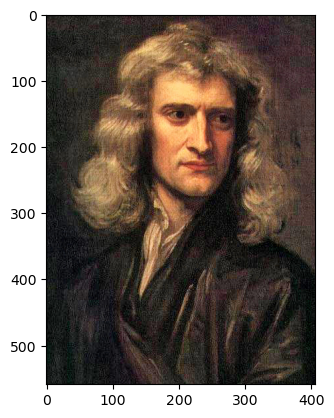

In [9]:
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import numpy as np

photo = imageio.imread("Newton.jpg")/255; # Read the image into the array photo
print(photo.shape)
plt.imshow(photo) # Plot the image on the screen
plt.show()

row, col, dim = photo.shape

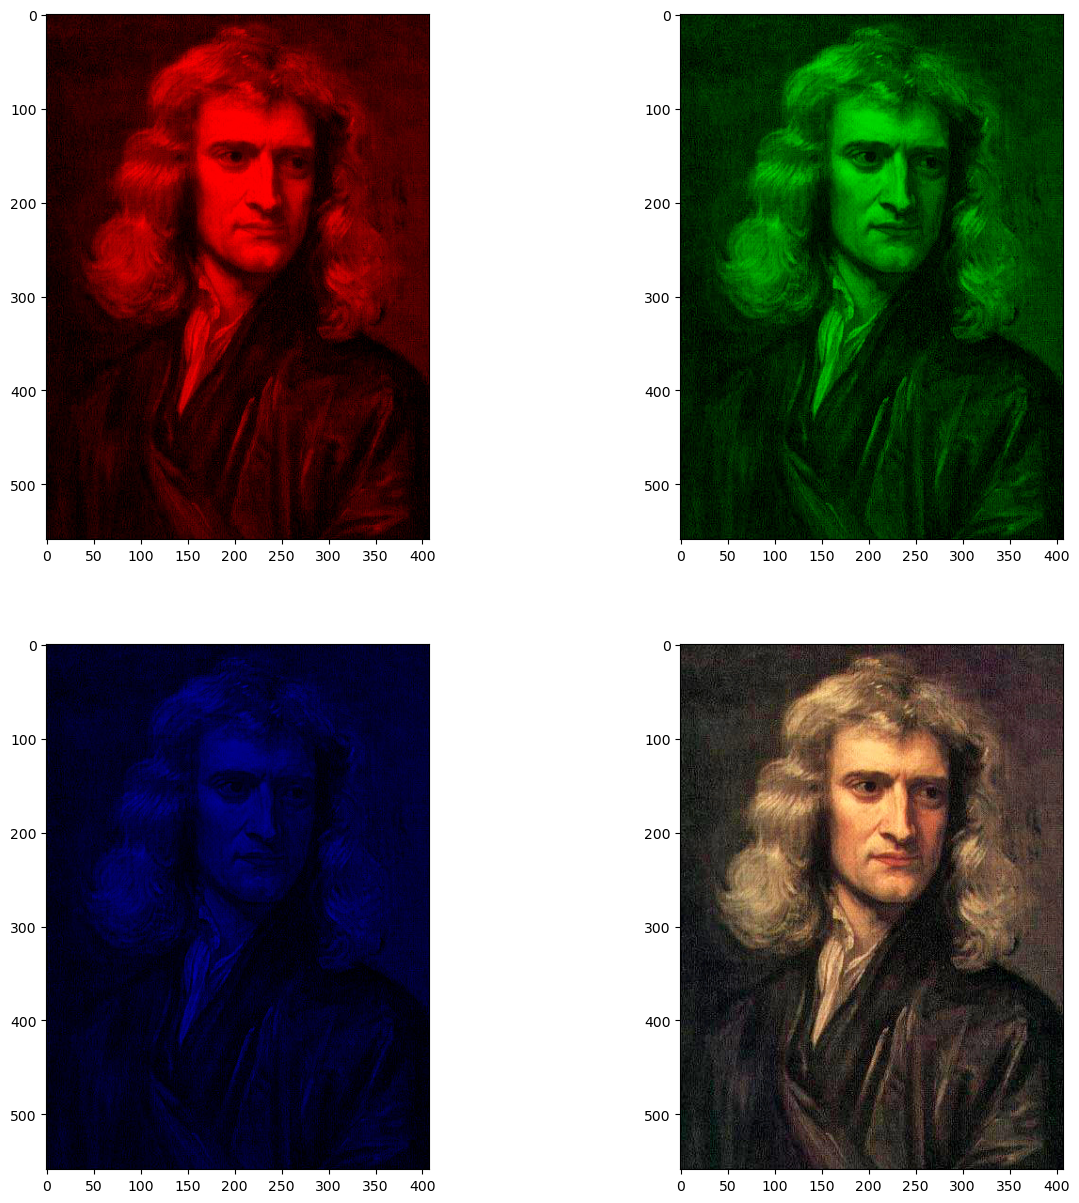

In [10]:
Red = np.zeros(photo.shape)
Green = np.zeros(photo.shape)
Blue = np.zeros(photo.shape)
# Plot the different matrices using imshow
f, axs = plt.subplots(2,2,figsize=(15,15))
# Separate the three basic colors
Red[:,:,0] = photo[:,:,0]; Green[:,:,1] = photo[:,:,1]; 
Blue[:,:,2] = photo[:,:,2]
plt.subplot(2,2,1); plt.imshow(Red); plt.subplot(2,2,2); plt.imshow(Green)
plt.subplot(2,2,3); plt.imshow(Blue); plt.subplot(2,2,4); plt.imshow(photo)
plt.show()

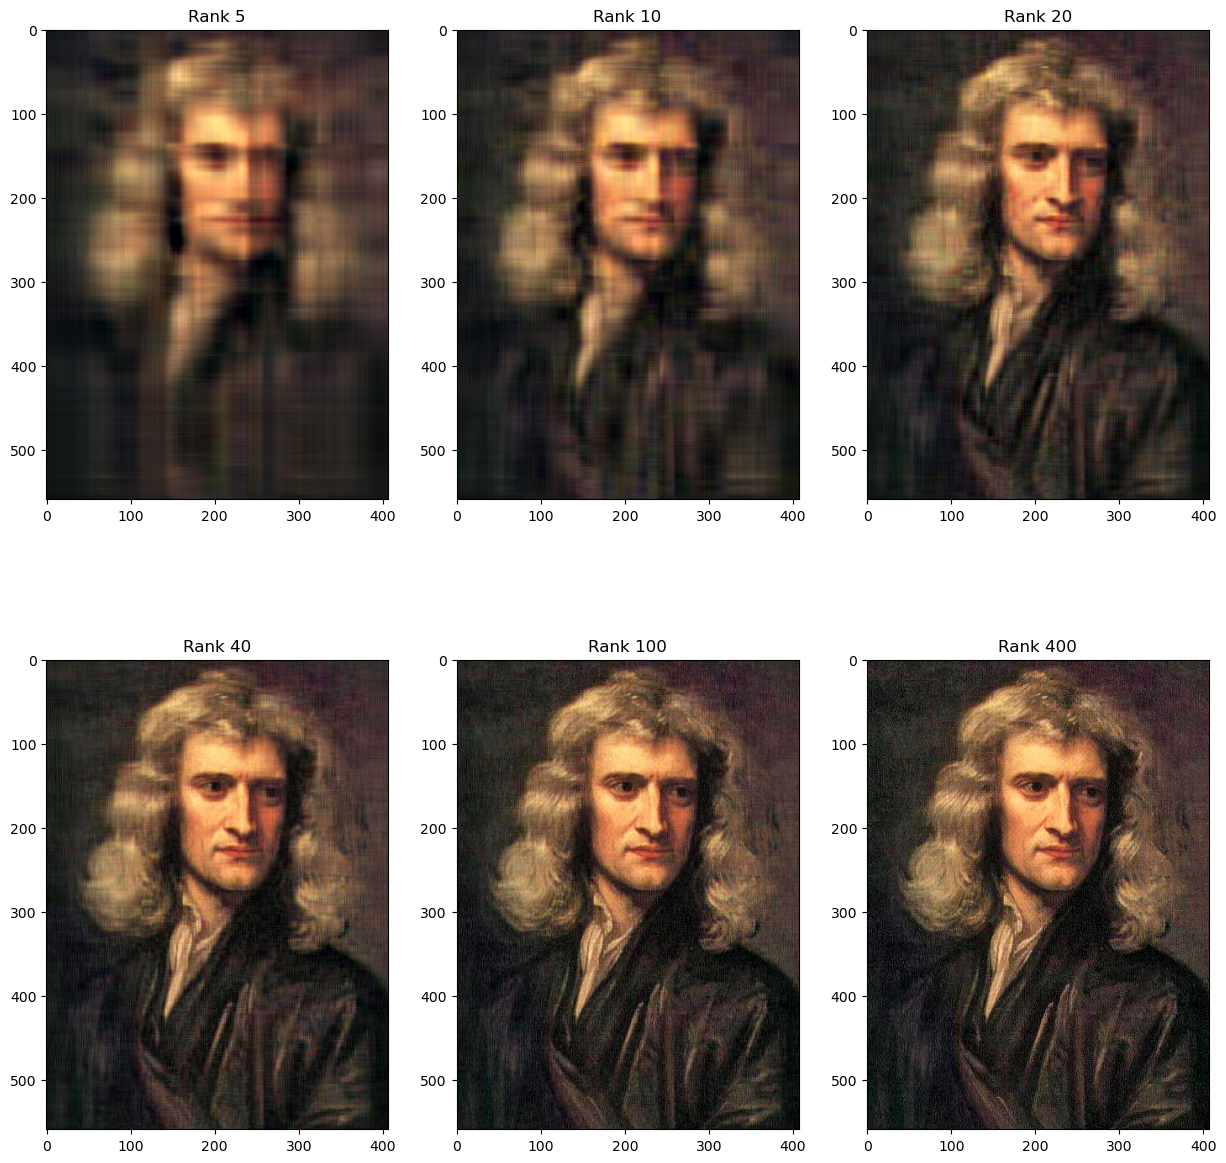

In [11]:
Red = photo[:,:,0]
Green = photo[:,:,1]
Blue = photo[:,:,2]

U_r,S_r,V_r = npl.svd(Red)
U_g,S_g,V_g = npl.svd(Green)
U_b,S_b,V_b = npl.svd(Blue)

sequence = [5, 10, 20, 40, 100, 400]

f, axs = plt.subplots(2,3,figsize=(15,15))

j=0
for k in sequence:
    U_r_c = U_r[:,0:k]
    V_r_c = V_r[0:k,:]
    U_g_c = U_g[:,0:k]
    V_g_c = V_g[0:k,:]
    U_b_c = U_b[:,0:k]
    V_b_c = V_b[0:k,:]
    S_r_c = np.diag(S_r[0:k])
    S_g_c = np.diag(S_g[0:k])
    S_b_c = np.diag(S_b[0:k])
    comp_img_r = np.dot(U_r_c, np.dot(S_r_c,V_r_c))
    comp_img_g = np.dot(U_g_c, np.dot(S_g_c,V_g_c))
    comp_img_b = np.dot(U_b_c, np.dot(S_b_c,V_b_c))
    comp_img = np.zeros((row, col, 3))
    comp_img[:,:,0] = comp_img_r
    comp_img[:,:,1] = comp_img_g
    comp_img[:,:,2] = comp_img_b
    comp_img[comp_img < 0] = 0
    comp_img[comp_img > 1] = 1
    j=j+1
    plt.subplot(2,3,j)
    plt.title('Rank %d'%(k))
    plt.imshow(comp_img)

plt.show()